# Module 3 Example

You have a dataset containing 4 different pairs of x-y data. Evaluate which is best suited for a linear regression and motivate your decision.

We begin by importing the relevant libraries and modules, as in the example code already provided.

In [1]:
import numpy
from scipy import stats
import pandas

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

And then we load in our dataset and take a look to make sure it imported correctly:

In [2]:
dataset = pandas.read_csv(
        r'https://raw.githubusercontent.com/imheidimarais/Engineering-Statistics/master/data/Module3_ExampleData.csv'
    )
dataset

,y1,y2,y3,y4,x1,x2,x3,x4
0,-0.590008,6.109097,18.902052,6.600000,-4.077142,0.364912,-0.320029,-4.334854
1,2.897751,2.569423,10.039318,6.250194,-2.817848,-1.066903,0.686477,-4.913783
2,1.717660,8.938055,12.188856,5.755407,-2.813435,-0.814810,0.460692,-4.857627
3,2.032746,4.643857,8.576063,5.557719,-3.075516,-1.065533,0.547859,-5.098690
4,-0.592400,2.381878,10.913344,5.953626,-2.562737,-1.211433,-0.508383,-4.672781
...,...,...,...,...,...,...,...,...
66,14.502090,-35.524058,-15.897787,10.852436,3.529093,5.034352,5.592084,1.944202
67,10.794383,-44.193657,-16.281525,16.594682,3.737345,4.921661,6.546217,2.745697
68,13.360703,-48.576065,-13.789450,28.354640,3.931266,5.823896,6.390443,1.825305
69,8.253791,-51.635758,-14.543517,31.389228,2.864648,5.206558,8.437668,2.435065


The first thing we should do is to plot the data to try and visually check several of the assumptions that we make (linearity, homoscedasticity, outliers). 

We do this with scatter plots, grouping the independent-dependent pairs.

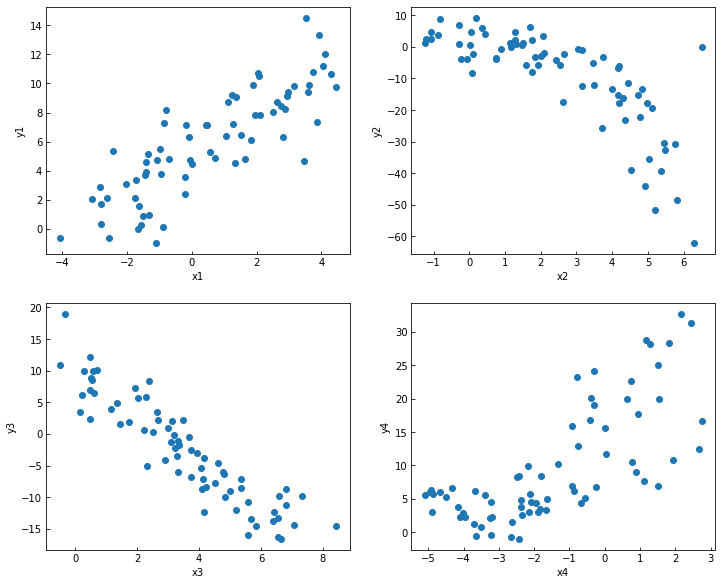

In [3]:
fig = pyplot.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

for ax, independent, dependent in [
    (ax1, 'x1', 'y1'), (ax2, 'x2', 'y2'), (ax3, 'x3', 'y3'), (ax4, 'x4', 'y4')
    ]:
    ax.tick_params(axis='both', direction='in')
    ax.set_xlabel(independent)
    ax.set_ylabel(dependent)

    ax.scatter(dataset[independent], dataset[dependent])

We see that dataset 1 and 3 look well suited, based on their scatter plots, to the correlation and regression analysis. While dataset 2 and 4 appear to have some nonlinearities. Dataset 2 has a clear outlier, while dataset 4 appears to be heteroscedastic, with the spread of data increasing as you move from left to right. 

We can check the assumptions of normal distribution of the $x$ and $y$ data with the Shapiro-Wilk test (a $p$-value greater than our desired significance level means that we fail to reject $H_0$, where $H_0$ is that the data is normally distributed), and calculate the Pearson correlation coefficient for each of the four datasets.

In [4]:
for independent, dependent in [
    ('x1', 'y1'), ('x2', 'y2'),  ('x3', 'y3'), ('x4', 'y4')
    ]:
    print(f"{independent}: ", stats.shapiro(dataset[independent]))
    print(f"{dependent}: ", stats.shapiro(dataset[dependent]))

    r, _ = stats.pearsonr(dataset[independent], dataset[dependent])
    print(f"Pearson correlation coefficient: {r}")
    print()

x1:  ShapiroResult(statistic=0.9574093222618103, pvalue=0.01689428836107254)
y1:  ShapiroResult(statistic=0.9828943014144897, pvalue=0.44541940093040466)
Pearson correlation coefficient: 0.8382546513168461

x2:  ShapiroResult(statistic=0.9576946496963501, pvalue=0.0175174530595541)
y2:  ShapiroResult(statistic=0.851683497428894, pvalue=6.555018217113684e-07)
Pearson correlation coefficient: -0.7647987088606631

x3:  ShapiroResult(statistic=0.9735121130943298, pvalue=0.13809439539909363)
y3:  ShapiroResult(statistic=0.974695086479187, pvalue=0.16121315956115723)
Pearson correlation coefficient: -0.9181070625318754

x4:  ShapiroResult(statistic=0.9632599949836731, pvalue=0.03585280105471611)
y4:  ShapiroResult(statistic=0.8676249980926514, pvalue=2.2098377030488336e-06)
Pearson correlation coefficient: 0.7232252897394855



We see that only dataset 3 satisfies the assumption of both $x$ and $y$ originating from normally distributed populations, while dataset 1 satisfies this for the $y$ data. However, this is not a deal breaker and we can continue with the analysis. 

The $r_{xy}$ values are all quite high, but perhaps are not very meaningful for dataset 2 and 4 due to the aforementioned nonlinearities.

Proceeding to the regression, and carrying out the residual analysis for each dataset:

y1 = 5.167199881786579 + 1.3524620074482157x1
Sklearn r squared:  0.702670860454327
residuals:  ShapiroResult(statistic=0.9908008575439453, pvalue=0.8873891830444336)

y2 = 4.104298264742152 + -5.529271479128917x2
Sklearn r squared:  0.5849170650749376
residuals:  ShapiroResult(statistic=0.9497261047363281, pvalue=0.006504211109131575)

y3 = 9.596194224228213 + -3.4787371766764297x3
Sklearn r squared:  0.8429205782709089
residuals:  ShapiroResult(statistic=0.9936881065368652, pvalue=0.9789513349533081)

y4 = 13.88797728259238 + 2.836009245103397x4
Sklearn r squared:  0.523054819718763
residuals:  ShapiroResult(statistic=0.9676486849784851, pvalue=0.06373892724514008)



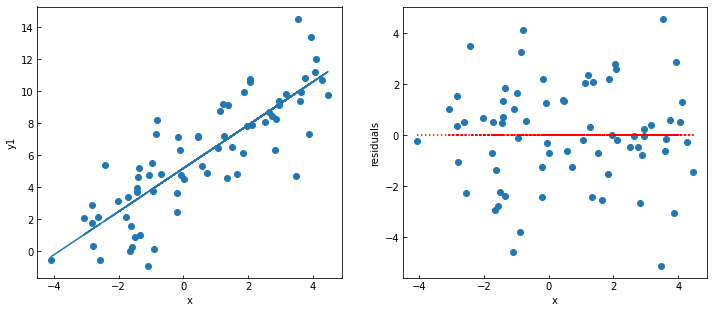

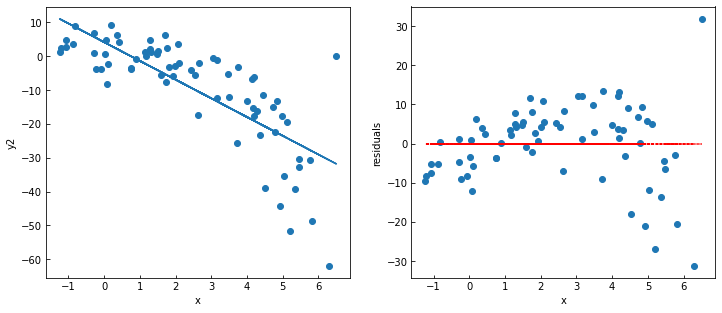

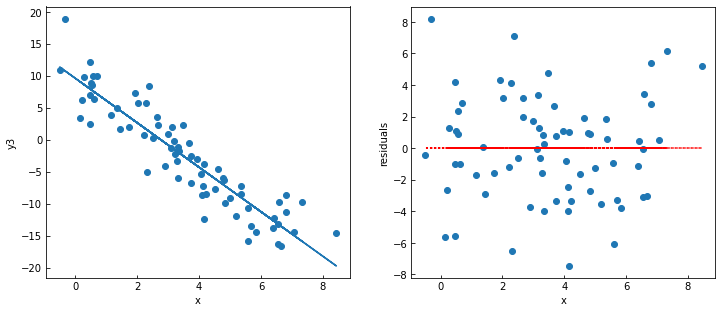

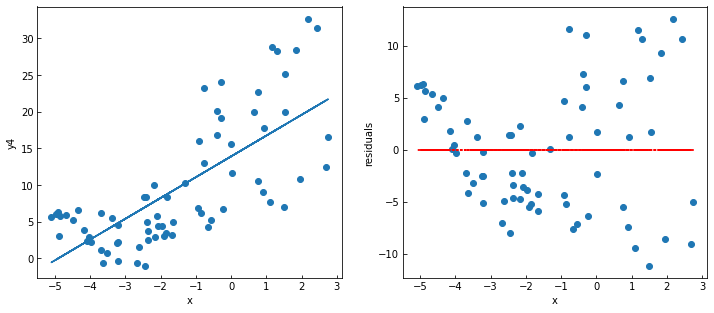

In [5]:
for independent, dependent in [
    ('x1', 'y1'), ('x2', 'y2'),  ('x3', 'y3'), ('x4', 'y4')
    ]:
    regression = LinearRegression()
    x = dataset[independent].to_numpy()
    x_reg = x.reshape(-1, 1)
    y = dataset[dependent].to_numpy()
    y_reg = y.reshape(-1,1)

    regression.fit(x_reg, y_reg)
    a = regression.intercept_[0]
    b = regression.coef_[0][0]
    print(f"{dependent} = {a} + {b}{independent}")

    y_estimated = a + b*x_reg

    fig = pyplot.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.tick_params(axis='both', direction='in')
    ax1.set_xlabel('x')
    ax1.set_ylabel(dependent)

    ax1.scatter(x_reg, y_reg)
    ax1.plot(x_reg, y_estimated)

    r_squared = regression.score(x_reg, y_reg)
    print("Sklearn r squared: ", r_squared)

    residuals = y_reg - y_estimated # calculate the residuals
    print("residuals: ", stats.shapiro(residuals))
    print()
    
    ax2.tick_params(axis='both', direction='in')
    ax2.set_xlabel('x')
    ax2.set_ylabel('residuals')

    ax2.scatter(x_reg, residuals) # plot the residuals

    xaxis = numpy.zeros_like(x_reg)  # make an array to plot the zero line
    ax2.plot(x_reg, xaxis, ls='dotted', c='red')  # plot the zero line with formatting

Looking at the $R^2$ values, the regression for the third dataset has the highest $R^2$, and thus the highest proportion of variance in $y$ that can be explained by $x$. The first dataset has a reasonable $R^2$ value, but we can see the data is more spread around the regression line.

Considering the residual analysis, the residuals for datasets 1 and 3 are well spread around 0 and do not have any clear pattern. This cannot be said for the residuals from datasets 2 and 4, which clearly have groups of data either above, or below, the zero line. The outlier is also evident for dataset 2. 

We can attempt to clean up, and linearise, dataset 2. Perhaps it will be better suited to a regression in this case.

We begin by making a copy of the data, and removing the outlier.

In [6]:
data2 = dataset.filter(['x2','y2'], axis=1)
print(data2.shape)
data2 = data2.drop(data2[(data2['x2'] > 5) & (data2['y2'] > -10)].index, axis=0)
print(data2.shape)

(71, 2)
(70, 2)


We print the shapes of the dataframes to ensure that our rough outlier removal based on the location of the point in the scatter plot did not remove more points than we expected it to. And we can plot the scatter plot to confirm it was removed successfully. 

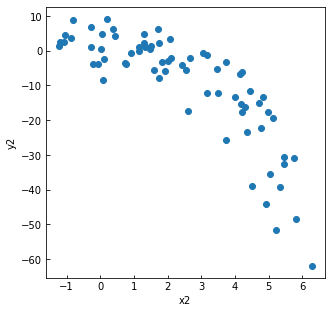

In [7]:
fig = pyplot.figure(figsize=(5,5))
ax1 = fig.add_subplot(1, 1, 1)

ax1.tick_params(axis='both', direction='in')
ax1.set_xlabel('x2')
ax1.set_ylabel('y2')

ax1.scatter(data2['x2'], data2['y2'])

We can hypothesise that the relationship is of the form $y = ax^2$, and plot $y2$ versus $x2^2$:

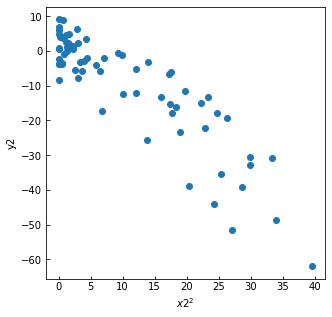

In [8]:
data2['x_squared'] = data2['x2']**2
fig = pyplot.figure(figsize=(5,5))
ax1 = fig.add_subplot(1, 1, 1)

ax1.tick_params(axis='both', direction='in')
ax1.set_xlabel('$x2^2$')
ax1.set_ylabel('y2')

ax1.scatter(data2['x_squared'], data2['y2'])

The data appears more linear, but the spread is not so good, with many datapoints clumped at lower $x$ values. However, we can calculate the same statistics as before and visualise the regression...

In [9]:
independent = 'x_squared'
dependent = 'y2'
print(f"{independent}: ", stats.shapiro(data2[independent]))
print(f"{dependent}: ", stats.shapiro(data2[dependent]))

r, _ = stats.pearsonr(data2[independent], data2[dependent])
print(f"Pearson correlation coefficient: {r}")

x_squared:  ShapiroResult(statistic=0.8453433513641357, pvalue=4.788215051121369e-07)
y2:  ShapiroResult(statistic=0.8553420901298523, pvalue=9.931874274116126e-07)
Pearson correlation coefficient: -0.8841503459689496


Neither $y2$ nor $x2^2$ appear to come from normally distributed populations, but the Pearson correlation coefficient is significantly improved.

y2 = 3.301066935708741 + -1.2686880534639482x_squared
Sklearn r squared:  0.7817218342770132
residuals:  ShapiroResult(statistic=0.9712219834327698, pvalue=0.10687578469514847)


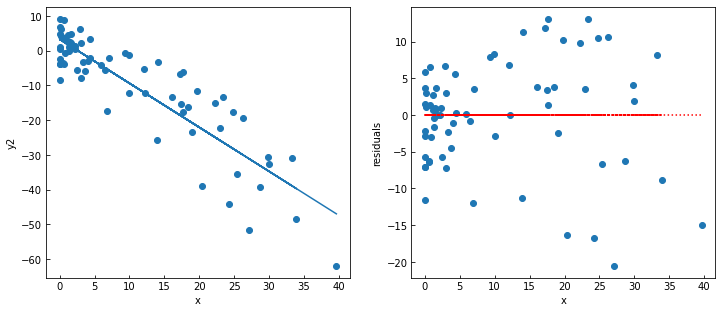

In [10]:
regression = LinearRegression()
x = data2[independent].to_numpy()
x_reg = x.reshape(-1, 1)
y = data2[dependent].to_numpy()
y_reg = y.reshape(-1,1)

regression.fit(x_reg, y_reg)
a = regression.intercept_[0]
b = regression.coef_[0][0]
print(f"{dependent} = {a} + {b}{independent}")

y_estimated = a + b*x_reg

r_squared = regression.score(x_reg, y_reg)
print("Sklearn r squared: ", r_squared)

residuals = y_reg - y_estimated # calculate the residuals
print("residuals: ", stats.shapiro(residuals))

fig = pyplot.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.tick_params(axis='both', direction='in')
ax1.set_xlabel('x')
ax1.set_ylabel(dependent)

ax1.scatter(x_reg, y_reg)
ax1.plot(x_reg, y_estimated)

ax2.tick_params(axis='both', direction='in')
ax2.set_xlabel('x')
ax2.set_ylabel('residuals')

ax2.scatter(x_reg, residuals) # plot the residuals

xaxis = numpy.zeros_like(x_reg)  # make an array to plot the zero line
ax2.plot(x_reg, xaxis, ls='dotted', c='red')  # plot the zero line with formatting

The regression shows that the residuals are normally distributed, despite the clumping, which suggests the transformation and resulting regression may in fact be meaningful!